## Nataf - Example 1

Author: Dimitris Giovanis

In [2]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Nataf
from UQpy.SampleMethods import MCS
import numpy as np
import matplotlib.pyplot as plt

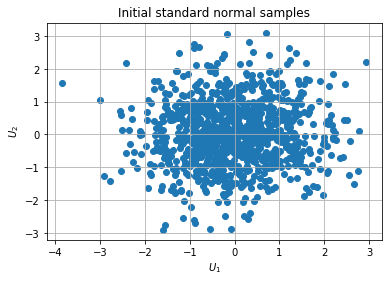

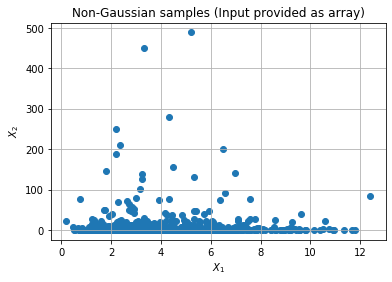

In [4]:
# Example 1: 
#In this example, the  Nataf class is used in order to transform 
#1000 samples of 2 uncorrelated standard normal variables to a lognormal and a gamma distribution.
#The example illustrates the transformation for samples drawn using the MCS class and for samples specified 
#as a  array.

x1 = MCS(dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

# Plot the initial samples
plt.figure()
plt.title('Initial standard normal samples')
plt.scatter(x1.samples[:, 0], x1.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

x_ng2 = Nataf(input_samples = x1.samples, corr = np.eye(2), dimension=2, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
x_ng2.inverse()


plt.figure()
plt.title('Non-Gaussian samples (Input provided as array)')
plt.scatter(x_ng2.samples[:, 0], x_ng2.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()